EMAIL SPAM DETECTION

NEEDED LIBRARIES

In [1]:
import numpy as np  # py lib used for numerical computations, maily dealing with multi-dimensional arrays.
import pandas as pd  # py lib used for data manipulation and analysis. 
import matplotlib.pyplot as plt  # py lib used for data visualization.
import seaborn as sns  # py lib used for data visualization, based on matplotlib.
import nltk  # py lib used for natural language processing.
from sklearn.model_selection import train_test_split  # a machine learning lib in python : tts function used to split your dataset into training and testing sets.  
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction - identifying and extracting relevant features from raw data, TfidfVectorizer - transforms text to feature vectors that can be used as input estimator.
from sklearn.linear_model import LogisticRegression  # for our first model build we are using logistic regression model, LR - used for binary classification tasks.
from sklearn.metrics import accuracy_score  # performance metrics - accuracy of the model.

LOADING DATASET

In [2]:
df = pd.read_csv('maildata.csv')
print(df)  # the whole dataset

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
df.head(5)  # first 5 rows of the dataset 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail(5)  # last 5 rows of the dataset

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


DATA CLEANING, TRANSFORMATION AND EDA (EXPLORATORY DATA ANALYSIS)

In [5]:
df.info()  # provides a summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()  # checking for null values, and if any null values are present then we process the dataset to have only non-null values 

Category    0
Message     0
dtype: int64

In [7]:
df.shape  # checking for the dimensions of the dataset 

(5572, 2)

In [8]:
df.groupby('Category').size()  # checking for the classes in the dataset 

Category
ham     4825
spam     747
dtype: int64

<Axes: xlabel='Category'>

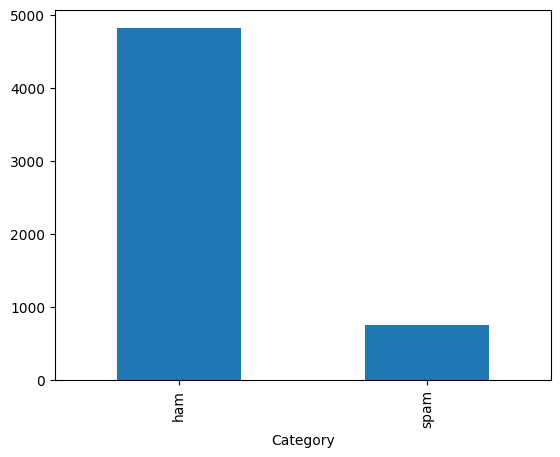

In [9]:
# Bar plot
df['Category'].value_counts().plot(kind='bar')  # plotting the classes in the dataset

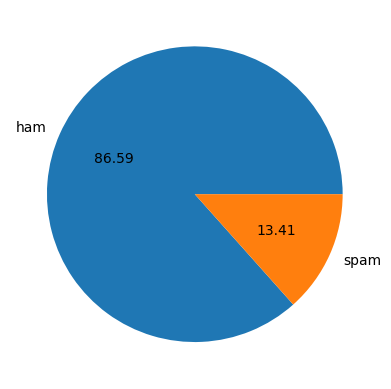

In [10]:
# Pie graph
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

NOTES: THE ABOVE DATASET IS IMBALANCED. ALMOST 4/5th OF THE DATASET IS MADE UP OF HAM.

In [11]:
# Statistical analysis of the dataset - 1

nltk.download('punkt')  # downloading the punkt tokenizer - used to split the text into words
nltk.download('punkt_tab') 
from nltk.tokenize import word_tokenize  # used to split the text into words
from nltk.tokenize import sent_tokenize  # used to split the text into sentences
word_tokens = df['Message'].apply(word_tokenize)  # tokenizing the words in the message
df['num_words'] = word_tokens.apply(len)  # contiains the number of words in the message 
df['num_char'] = df['Message'].apply(len)  # adding a new column to the dataset - num_char, which contains the length of the message
df['num_sentences'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Category,Message,num_words,num_char,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",24,111,2
1,ham,Ok lar... Joking wif u oni...,8,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,ham,U dun say so early hor... U c already then say...,13,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [12]:
# Statistical analysis of the dataset - 2

# for Ham messages
ham_df = df[df['Category'] == 'ham'][['num_words', 'num_char', 'num_sentences']]
ham_df.describe()

,num_words,num_char,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,17.425699,71.448290,1.846010
std,14.118631,58.434864,1.475377
min,1.000000,2.000000,1.000000
25%,8.000000,33.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,23.000000,93.000000,2.000000
max,220.000000,910.000000,38.000000


In [13]:
# for spam messages 
spam_df = df[df['Category'] == 'spam'][['num_words', 'num_char', 'num_sentences']]
spam_df.describe()

,num_words,num_char,num_sentences
count,747.000000,747.000000,747.000000
mean,27.878179,137.989290,3.029451
std,7.036282,29.980287,1.552198
min,2.000000,7.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


NOTE: 
- WE CAN SEE THAT THE SPAM MESSAGES ARE TYPICALLY LONGER IN LENGTH.
- DUE TO THIS THESE SENTENCES CONTAIN MORE WORDS AND CHARACTERS.

<Axes: xlabel='num_char', ylabel='Count'>

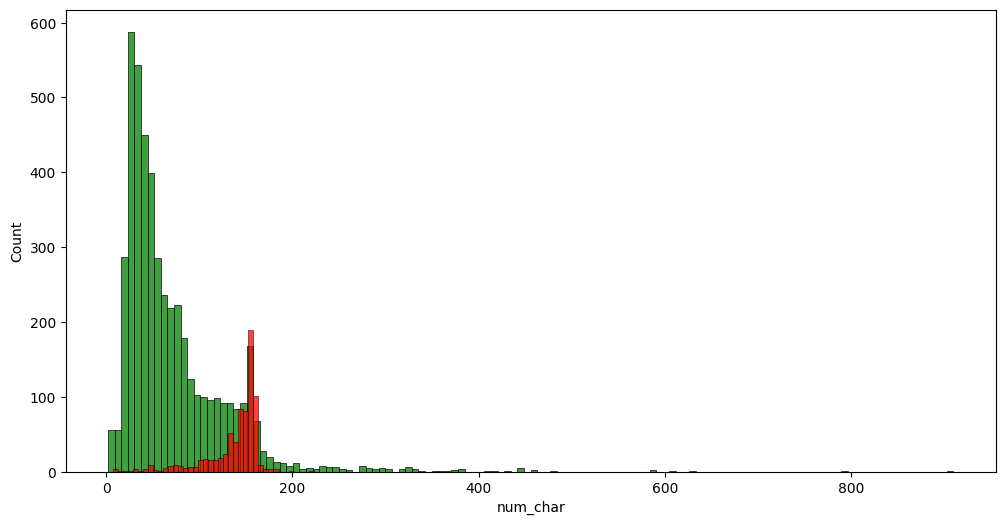

In [14]:
# histogram for character count
plt.figure(figsize=(12,6)) 
sns.histplot(df[df['Category']=='ham']['num_char'],color='green')
sns.histplot(df[df['Category']=='spam']['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

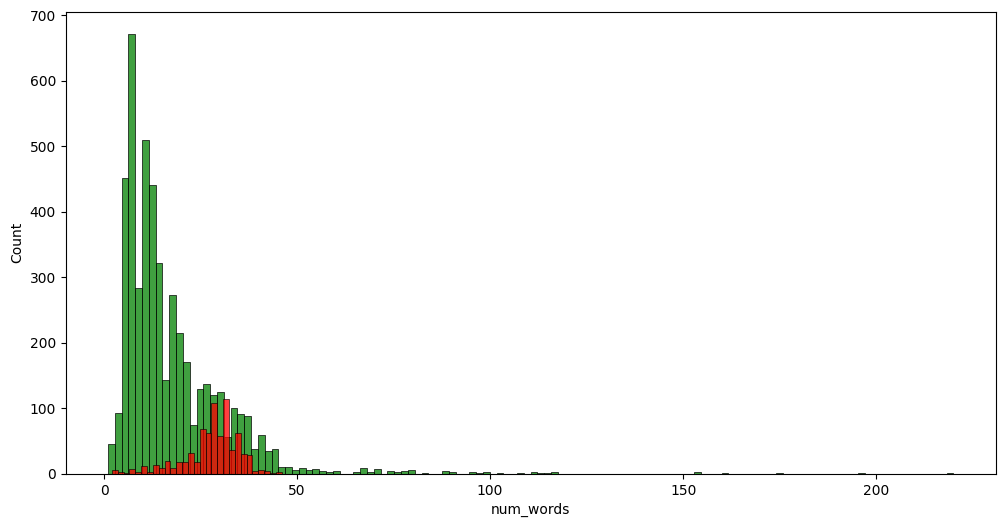

In [15]:
# histogram for word count 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']=='ham']['num_words'], color='green')
sns.histplot(df[df['Category']=='spam']['num_words'], color='red')

# OBSERVATIONS: 
## HAM MESSAGES:
    - MEAN LENGTH : ~50-100 CHARACTERS / ~15-25 WORDS
    - ON AVERAGE SHORT TEXTS (BUT DUE TO VARIANCE SOME CAN BE EXTREMELY SHORT WHILE OTHERS VERY LONG)
    - SPREAD/VARIANCE : HIGH (SOME SHORT/ SOME LONG)
    - SKEWNESS : RIGHT 
    - THEY USE LESS SENTENCES ON AVERAGE
## SPAM MESSAGES:
    - MEAN LENGTH : ~130-150 CHARACTERS / ~20-40 WORDS
    - ON AVERAGE MED-LENGTH TEXTS.
    - SPREAD/VARIANCE : LOW
    - SKEWNESS : LESS SKEWED BUT PEAKS IN MID-RANGE
    - THEY USE MORE SENTENCES ON AVERAGE

# POSSIBLE CONCLUSIONS:
    - SPAM MESSAGES TEND TO HAVE MORE WORDS AND CHARACTERS.
    - SPAM MESSAGES HAVE A STANDARDIZED LENGTH, SUGGESTS THEY FOLLOW SIMILAR TEMPLATE, THEREBY SHOWING A LOW VARIANCE
    - THEY HAVE MORE SENTENCES IN GENERAL PERHAPS TO MISLEAD USERS
    - HIGH VARIANCE IN HAM SUGGEST DIVERSE CONTENT

In [19]:
# encoding 
# replacing the values of the column 'Category', where 0 -> spam and 1 -> ham 
df['Category'] = df['Category'].replace({'spam': 0, 'ham': 1})
df_heat = df.drop(columns=['Message'])

In [20]:
print(df_heat.dtypes)

Category         int64
num_words        int64
num_char         int64
num_sentences    int64
dtype: object


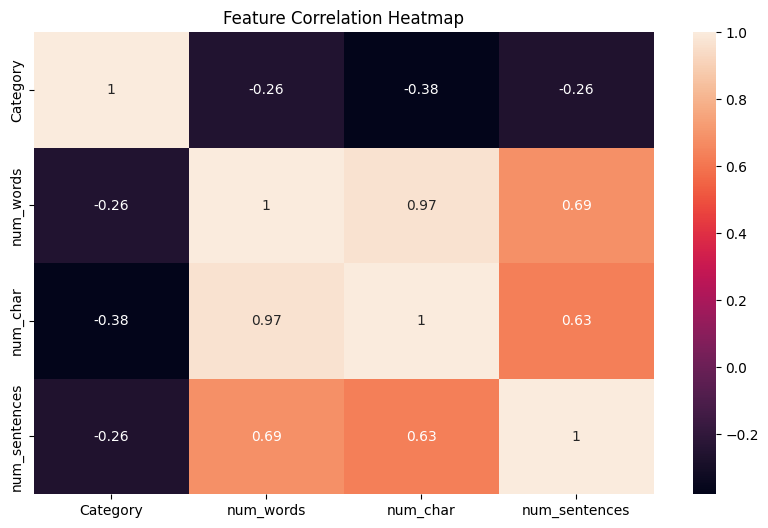

In [22]:
# CHECKING FOR CORRELATION - FEATURE SELECTION USING HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(df_heat.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# OBSERVATIONS : 
    - MULTI-COLLINEARITY EXISTS BETWEEN ALL THREE FEATURES WHICH MAY LEAD TO OVERFITTING DUE TO LEARNING OF SIMILAR PATTERNS MULTIPLE TIMES.
    - NO. OF CHARACTERS HAS THE HIGHEST CORRELATION AMONG THE FEATURES WITH THE CATEGORY.
# CONCLUSIONS : 
    - TO DECREASE OVERFITTING WE WILL ONLY BE USING ONE OF THE FEATURES FROM THE THREE, I.E. NO. OF CHARACTERS AS IT HAS THE HIGHEST CORRELATION WITH THE TARGET/LABEL

In [10]:
X = df['Message']  # features 
y = df['Category']  # target variable 

In [ ]:
print(X)

In [ ]:
print(y)